# Classification

In [9]:
import numpy as np
import pandas as pd
import openml

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [10]:
classifiers = {
    'KNeighborsClassifier': (KNeighborsClassifier, {'n_neighbors': [1,2,3,4,5]}),
    'GaussianNB': (GaussianNB, {'var_smoothing': [1e-9, 1e-5, 1e-1]}),
    'LogisticRegression': (LogisticRegression, {'C': [0.1, 0.5, 1.0, 2.0, 5.0]}),
    'DecisionTreeClassifier': (DecisionTreeClassifier, {'max_depth': [1, 3, 5, 8, 10]}),
    'GradientBoostingClassifier': (GradientBoostingClassifier, {'max_depth': [1, 3, 5, 8, 10]}),
    'RandomForestClassifier': (RandomForestClassifier, {'max_depth': [1, 3, 5, 8, 10]}),
    'MLPClassifier': (MLPClassifier, {'alpha': [1e-5, 1e-3, 0.1, 10]})
}

In [4]:
datasets = {
    'steel-plates-fault': openml.datasets.get_dataset(1504, download_data=True, download_qualities=True, download_features_meta_data=True).get_data()[0],
    'ionosphere': openml.datasets.get_dataset(59, download_data=True, download_qualities=True, download_features_meta_data=True).get_data()[0],
    'banknote-authentication': openml.datasets.get_dataset(1462, download_data=True, download_qualities=True, download_features_meta_data=True).get_data()[0]
}

In [11]:
results = {}
best_param = {}

for dataset_name, data in datasets.items():
    X = data.iloc[:, :-1]  # Select all columns except the last as features
    y = data.iloc[:, -1]   # Select the last column as the target
    results[dataset_name] = {}

    for clf_name, (clf_class, param_grid) in classifiers.items():
        # results[dataset_name][clf_name] = []
        param_acc_dict = {}
        
        for param, values in param_grid.items():
            valueList = []
            accList = []
            for value in values:
                accuracies = []

                for i in range(50):
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=i, shuffle=True)
                    clf = clf_class()
                    clf.set_params(**{param: value})
                    clf.fit(X_train, y_train)
                    y_pred = clf.predict(X_test)
                    accuracies.append(accuracy_score(y_test, y_pred))
                valueList.append(value)
                accList.append(accuracies)
               
        mean_accuracies = [np.mean(accuracies) for value, accuracies in zip(valueList, accList)]
        mean_errors = [1 - accuracy for accuracy in mean_accuracies]
        best_index = np.argmax(mean_accuracies)
        best_mean_error = mean_errors[best_index]
        best_param = values[best_index]

        print("Dataset: ", dataset_name)
        print("Clf: ", clf_name)
        print("Mean accuracy: ", mean_accuracies)
        print("Best index: ", best_param)
        print("Best mean error: ", best_mean_error)
        
        results[dataset_name][clf_name] = [(param, valueList, accList)]


Dataset:  steel-plates-fault
Clf:  KNeighborsClassifier
Mean accuracy:  [0.5963542739443872, 0.6337384140061793, 0.6204737384140062, 0.6400823892893923, 0.6316168898043254]
Best index:  4
Best mean error:  0.3599176107106077
Dataset:  steel-plates-fault
Clf:  GaussianNB
Mean accuracy:  [0.5026158599382081, 0.5091864057672503, 0.6447991761071061]
Best index:  0.1
Best mean error:  0.35520082389289387


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Dataset:  steel-plates-fault
Clf:  LogisticRegression
Mean accuracy:  [0.6918846549948507, 0.6899691040164778, 0.6923377960865088, 0.6904016477857878, 0.6919052523171988]
Best index:  1.0
Best mean error:  0.3076622039134912
Dataset:  steel-plates-fault
Clf:  DecisionTreeClassifier
Mean accuracy:  [0.6520494335736353, 0.8514933058702369, 0.9693305870236868, 1.0, 1.0]
Best index:  8
Best mean error:  0.0
Dataset:  steel-plates-fault
Clf:  GradientBoostingClassifier
Mean accuracy:  [1.0, 1.0, 1.0, 1.0, 1.0]
Best index:  1
Best mean error:  0.0
Dataset:  steel-plates-fault
Clf:  RandomForestClassifier
Mean accuracy:  [0.6520494335736353, 0.839608650875386, 0.9500514933058704, 0.9802677651905253, 0.9850051493305871]
Best index:  10
Best mean error:  0.014994850669412862
Dataset:  steel-plates-fault
Clf:  MLPClassifier
Mean accuracy:  [0.5851905252317199, 0.5855200823892894, 0.5929145211122554, 0.5946858908341915]
Best index:  10
Best mean error:  0.40531410916580846
Dataset:  ionosphere
Cl

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_

Dataset:  ionosphere
Clf:  MLPClassifier
Mean accuracy:  [0.9078409090909091, 0.9037499999999998, 0.9026136363636365, 0.8653409090909091]
Best index:  1e-05
Best mean error:  0.09215909090909091
Dataset:  banknote-authentication
Clf:  KNeighborsClassifier
Mean accuracy:  [0.9993294460641399, 0.9997959183673469, 0.9994169096209913, 0.9995335276967929, 0.9988629737609329]
Best index:  2
Best mean error:  0.00020408163265306367
Dataset:  banknote-authentication
Clf:  GaussianNB
Mean accuracy:  [0.8400291545189504, 0.8400291545189504, 0.8243148688046648]
Best index:  1e-09
Best mean error:  0.15997084548104956
Dataset:  banknote-authentication
Clf:  LogisticRegression
Mean accuracy:  [0.9824781341107872, 0.9874052478134111, 0.9890087463556851, 0.9887172011661807, 0.9887463556851311]
Best index:  1.0
Best mean error:  0.010991253644314858
Dataset:  banknote-authentication
Clf:  DecisionTreeClassifier
Mean accuracy:  [0.842798833819242, 0.9260641399416909, 0.9698542274052477, 0.9776093294460

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_

Dataset:  banknote-authentication
Clf:  MLPClassifier
Mean accuracy:  [1.0, 1.0, 1.0, 0.9824198250728863]
Best index:  1e-05
Best mean error:  0.0


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


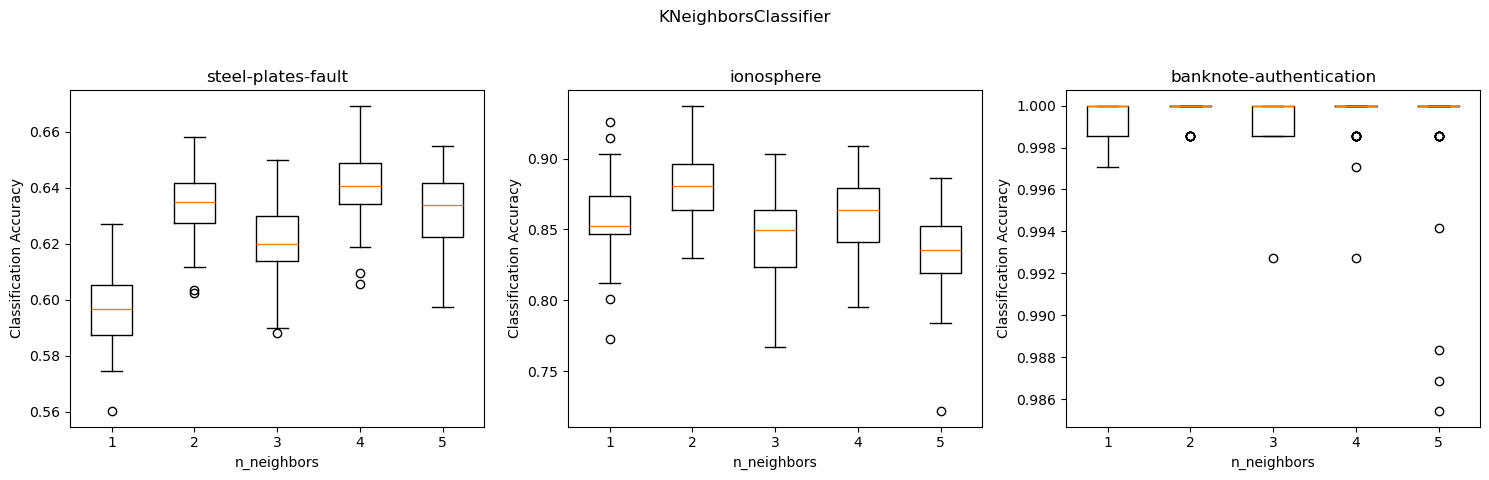

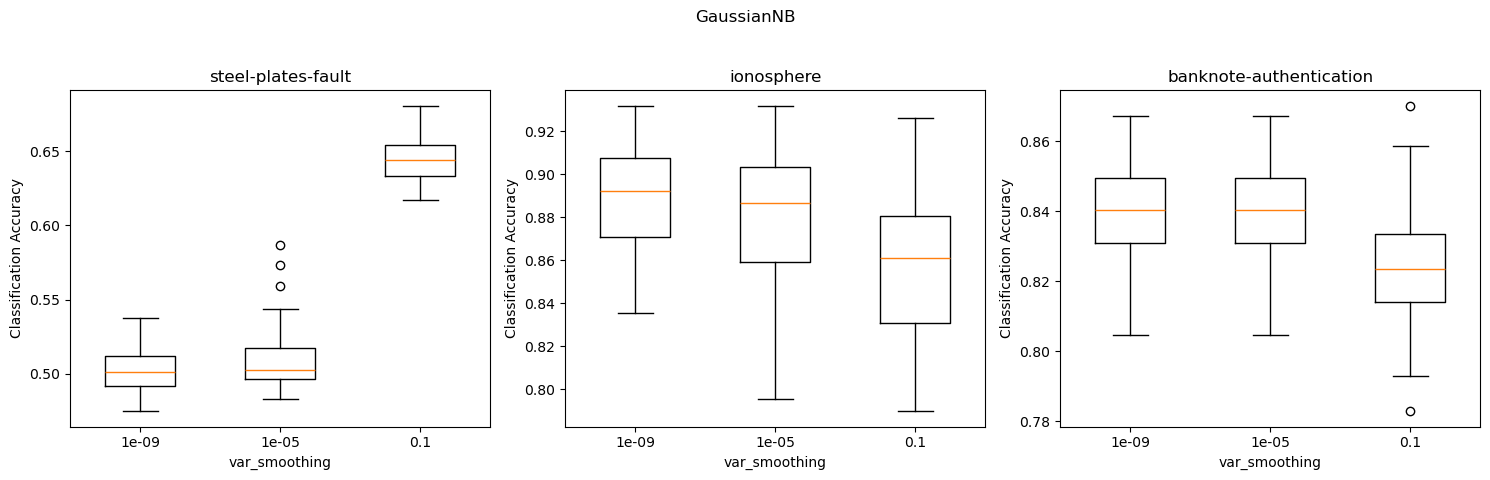

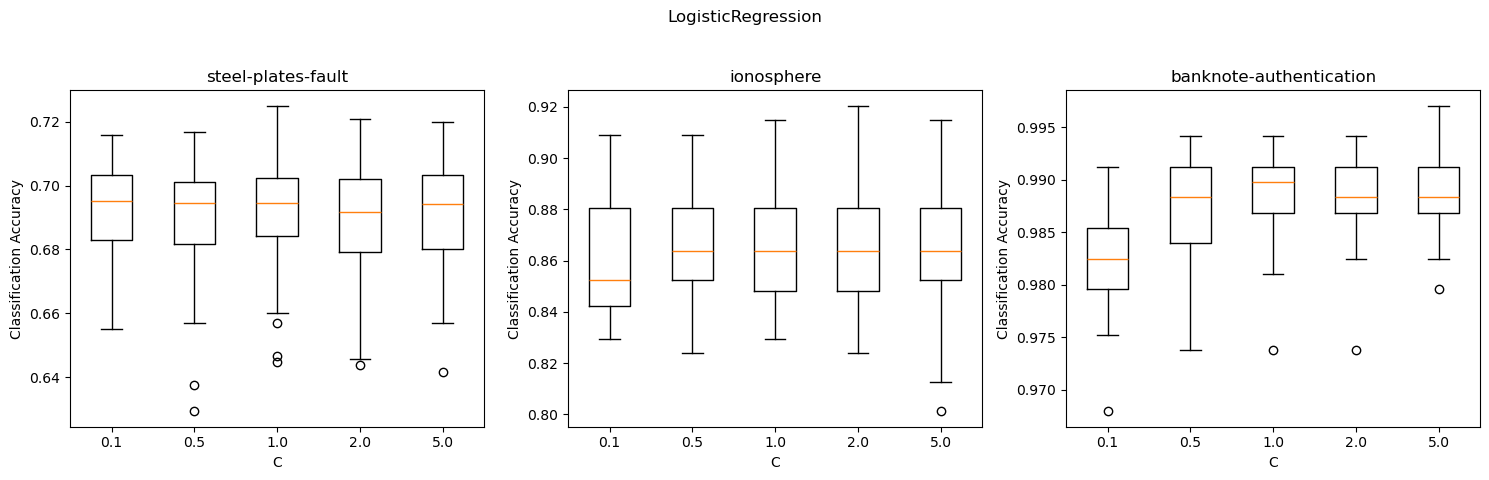

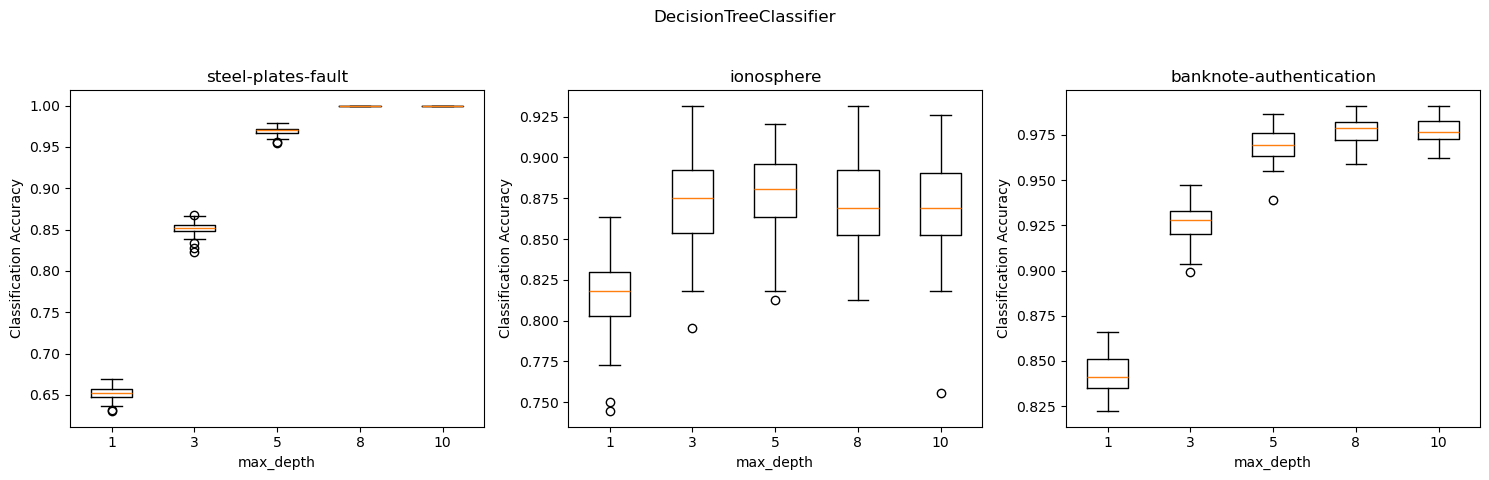

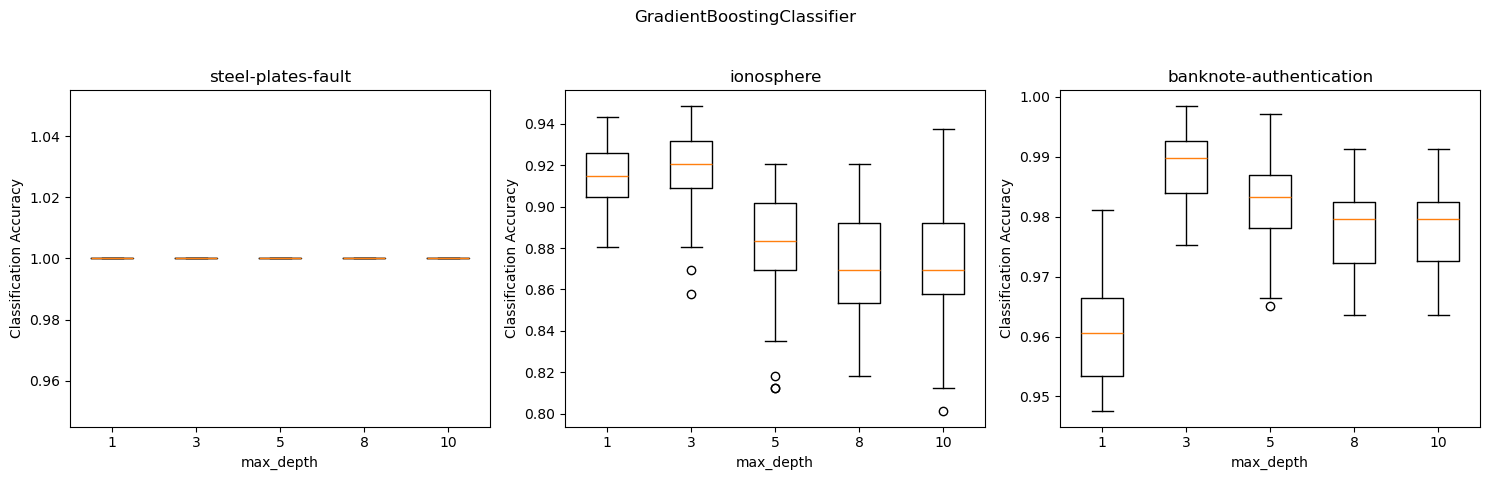

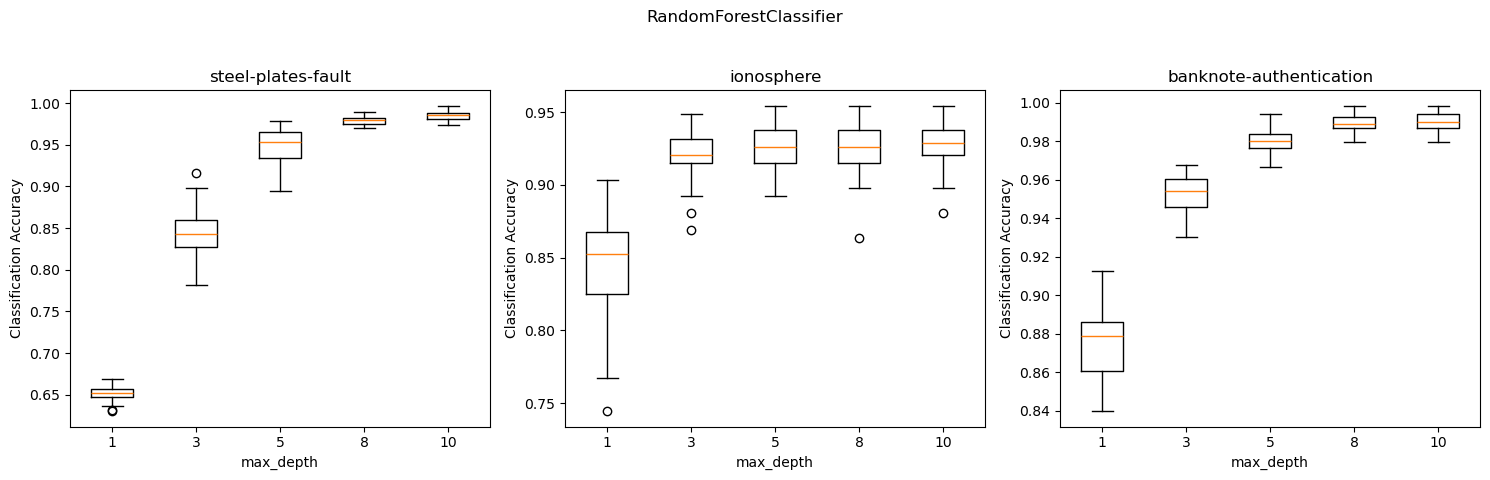

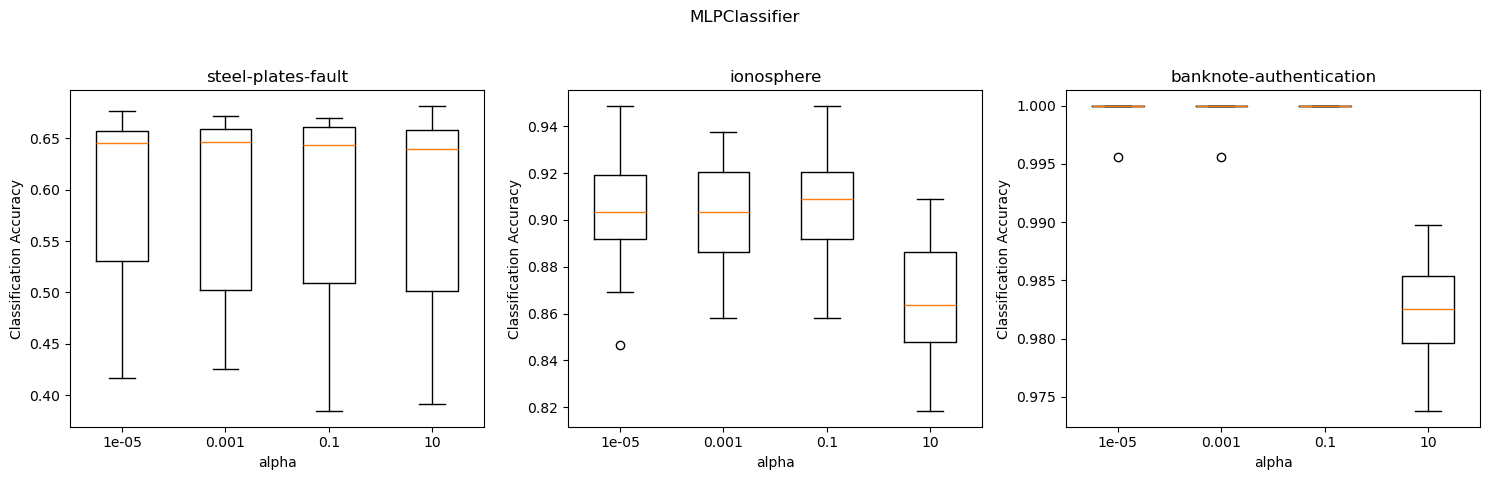

In [298]:

for clf_name in classifiers:
    fig, axes = plt.subplots(1, len(datasets), figsize=(15, 5))
    fig.suptitle(clf_name)

    for i, (dataset_name, result) in enumerate(results.items()):
        param = result[clf_name][0][0]
        valueList = result[clf_name][0][1]
        accuraciesList = result[clf_name][0][2]

        # Prepare data for boxplot
        boxplot_data = [acc for acc in accuraciesList] 
        positions = list(range(1, len(valueList) + 1))

        # Create the boxplot
        axes[i].boxplot(boxplot_data, positions=positions, widths=0.5)
        axes[i].set_title(f'{dataset_name}')
        axes[i].set_xlabel(f'{param}')
        axes[i].set_ylabel('Classification Accuracy')
        axes[i].set_xticks(positions)
        axes[i].set_xticklabels(valueList)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Clustering

In [58]:
from sklearn.datasets import make_blobs, make_classification, make_circles
from sklearn.cluster import KMeans, AffinityPropagation, DBSCAN, AgglomerativeClustering, Birch, MeanShift
from sklearn.mixture import GaussianMixture


In [66]:
seed = 42

cluster_datasets = {
    "Blobs": make_blobs(n_samples=1000, n_features=2, random_state=seed),
    "Classification": make_classification(n_samples=1000, n_informative=2, n_clusters_per_class=1, random_state=seed),
    "Circles": make_circles(n_samples=1000, noise=0.3, random_state=seed)
}

In [87]:
clustering_algorithms = {
    "K-Means": KMeans(n_clusters=3, random_state=seed),
    "Affinity Propagation": AffinityPropagation(random_state=seed),
    "DBSCAN": DBSCAN(),
    "Gaussian Mixture Model": GaussianMixture(),
    "BIRCH": Birch(n_clusters=3),
    "Agglomerative Clustering": AgglomerativeClustering(n_clusters=3),
    "Mean Shift": MeanShift()
}

In [68]:
# results = {name: {} for name in clustering_algorithms}

# for dataset_name, (X, y) in cluster_datasets.items():
#     for algo_name, algorithm in clustering_algorithms.items():
#         if algo_name == "Affinity Propagation" or algo_name == "DBSCAN":
#             clusters = algorithm.fit_predict(X)
#         else:
#             clusters = algorithm.fit(X).predict(X)
#         results[algo_name][dataset_name] = clusters

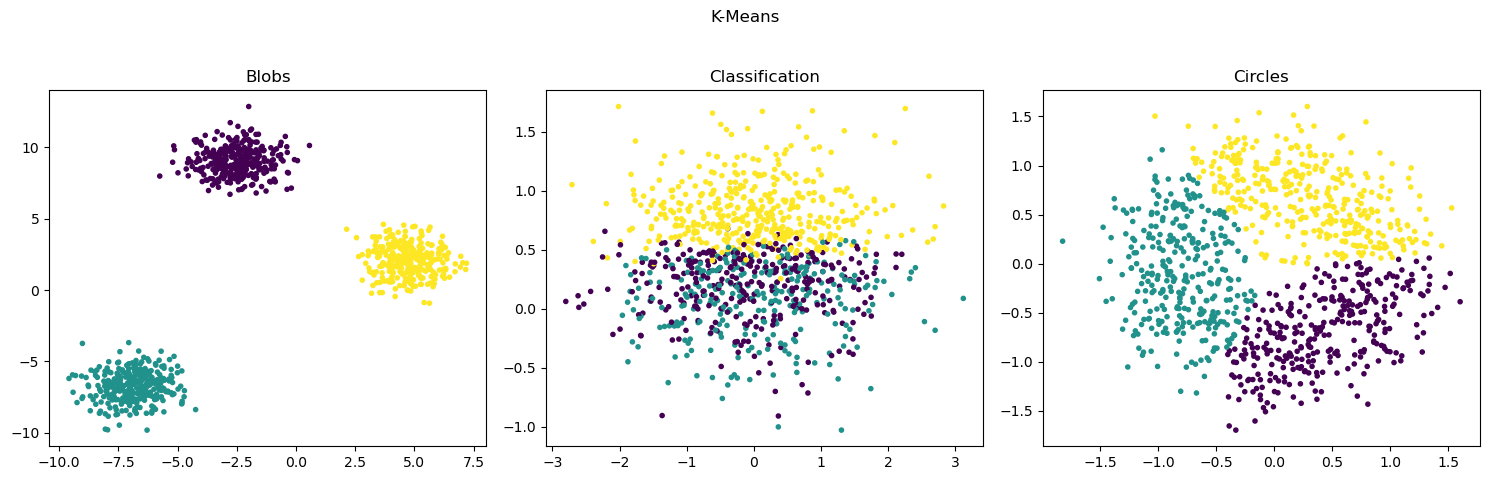

/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


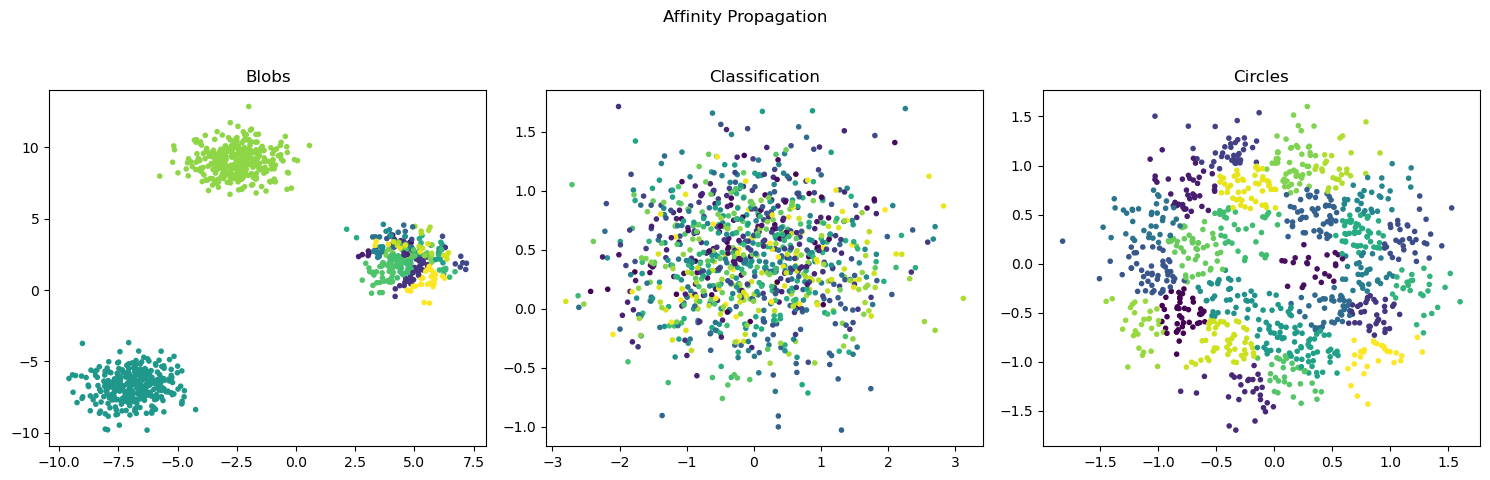

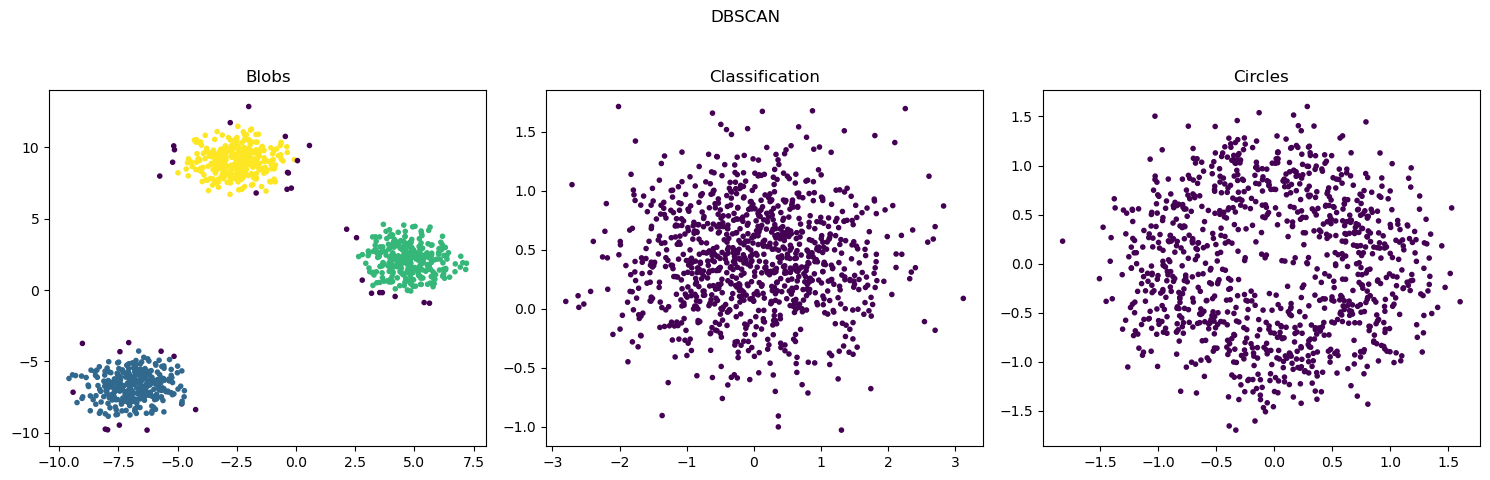

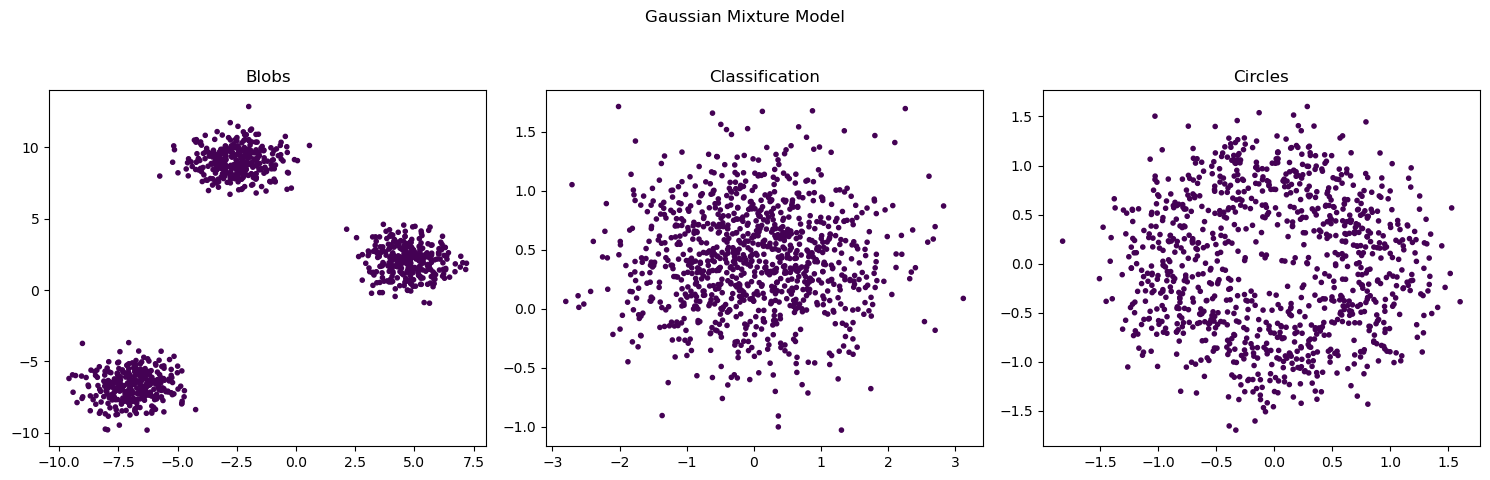

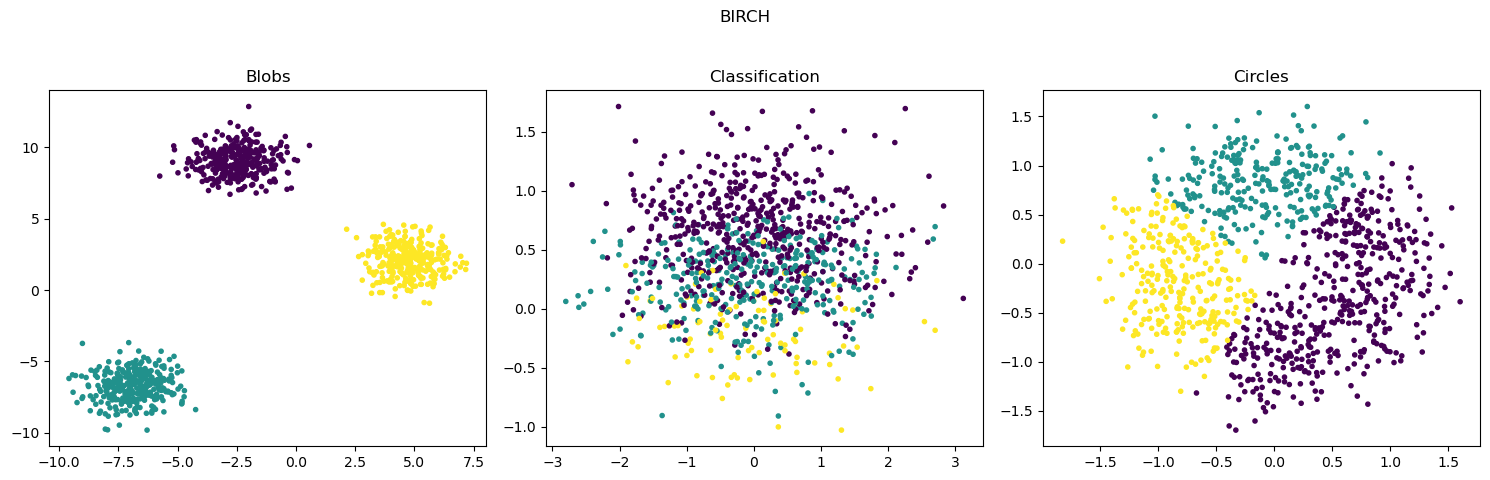

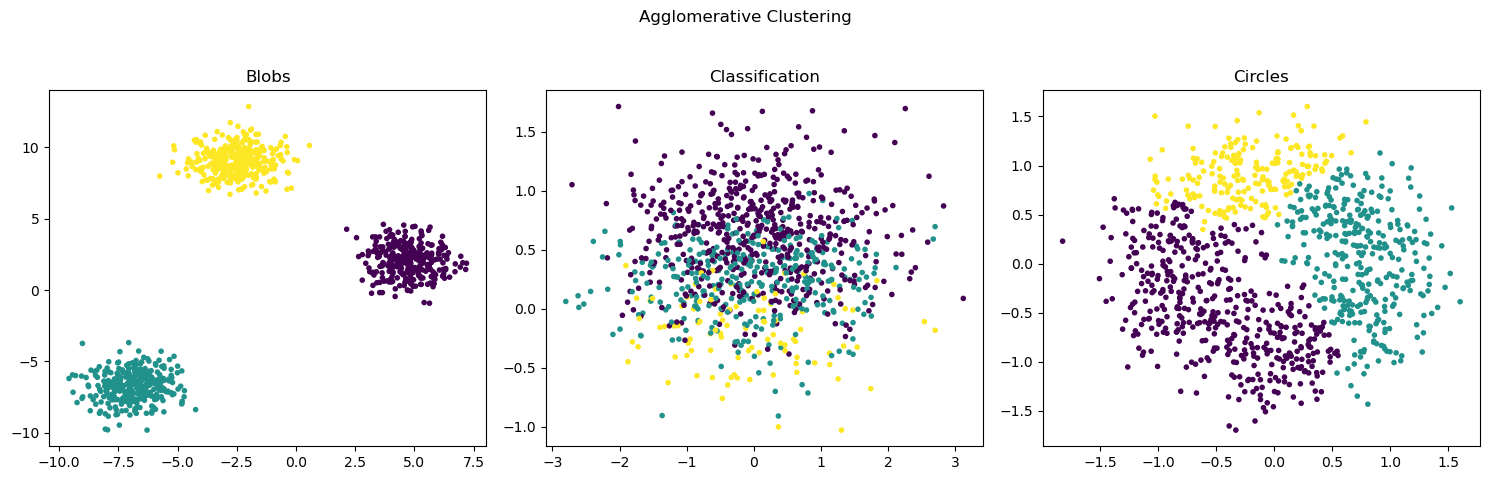

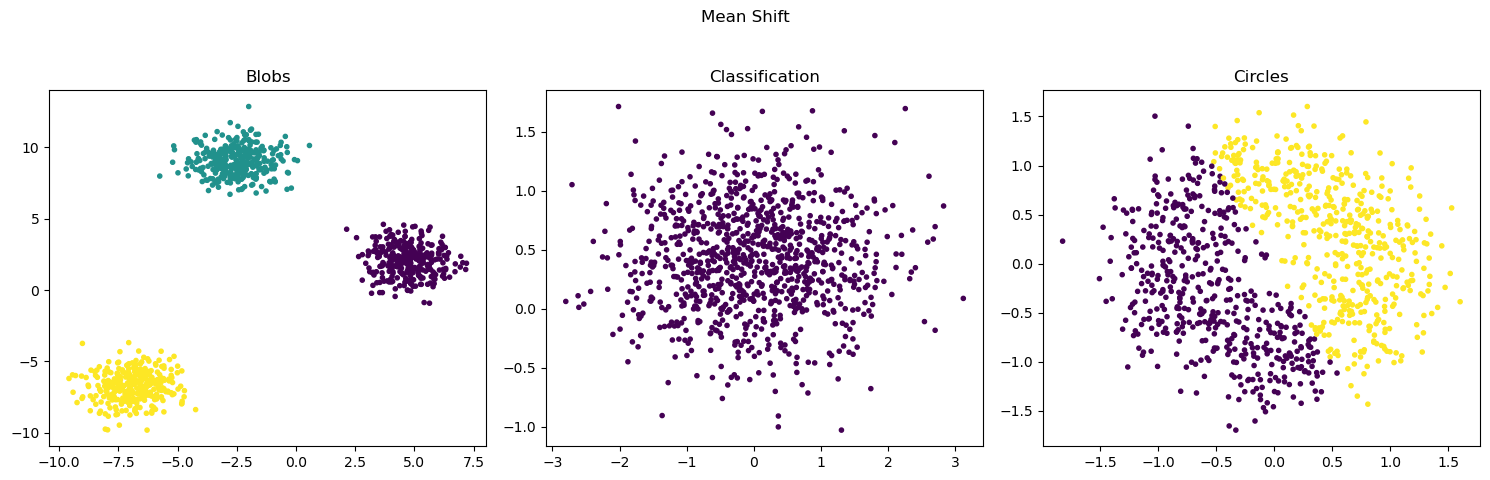

In [88]:
for algo_name, algorithm in clustering_algorithms.items():
    
    fig, axes = plt.subplots(1, len(cluster_datasets), figsize=(15, 5))
    fig.suptitle(algo_name)

    for i, (dataset_name, (X, y)) in enumerate(cluster_datasets.items()):
        algorithm.fit(X)
        # if algo_name == "Affinity Propagation" or algo_name == "DBSCAN":
        #     clusters = algorithm.fit_predict(X)
        if algo_name == "Gaussian Mixture Model":
            clusters = algorithm.predict(X)
        else:
            clusters = algorithm.labels_

        ax = axes[i]
        ax.set_title(f'{dataset_name}')
        ax.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='.')


    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

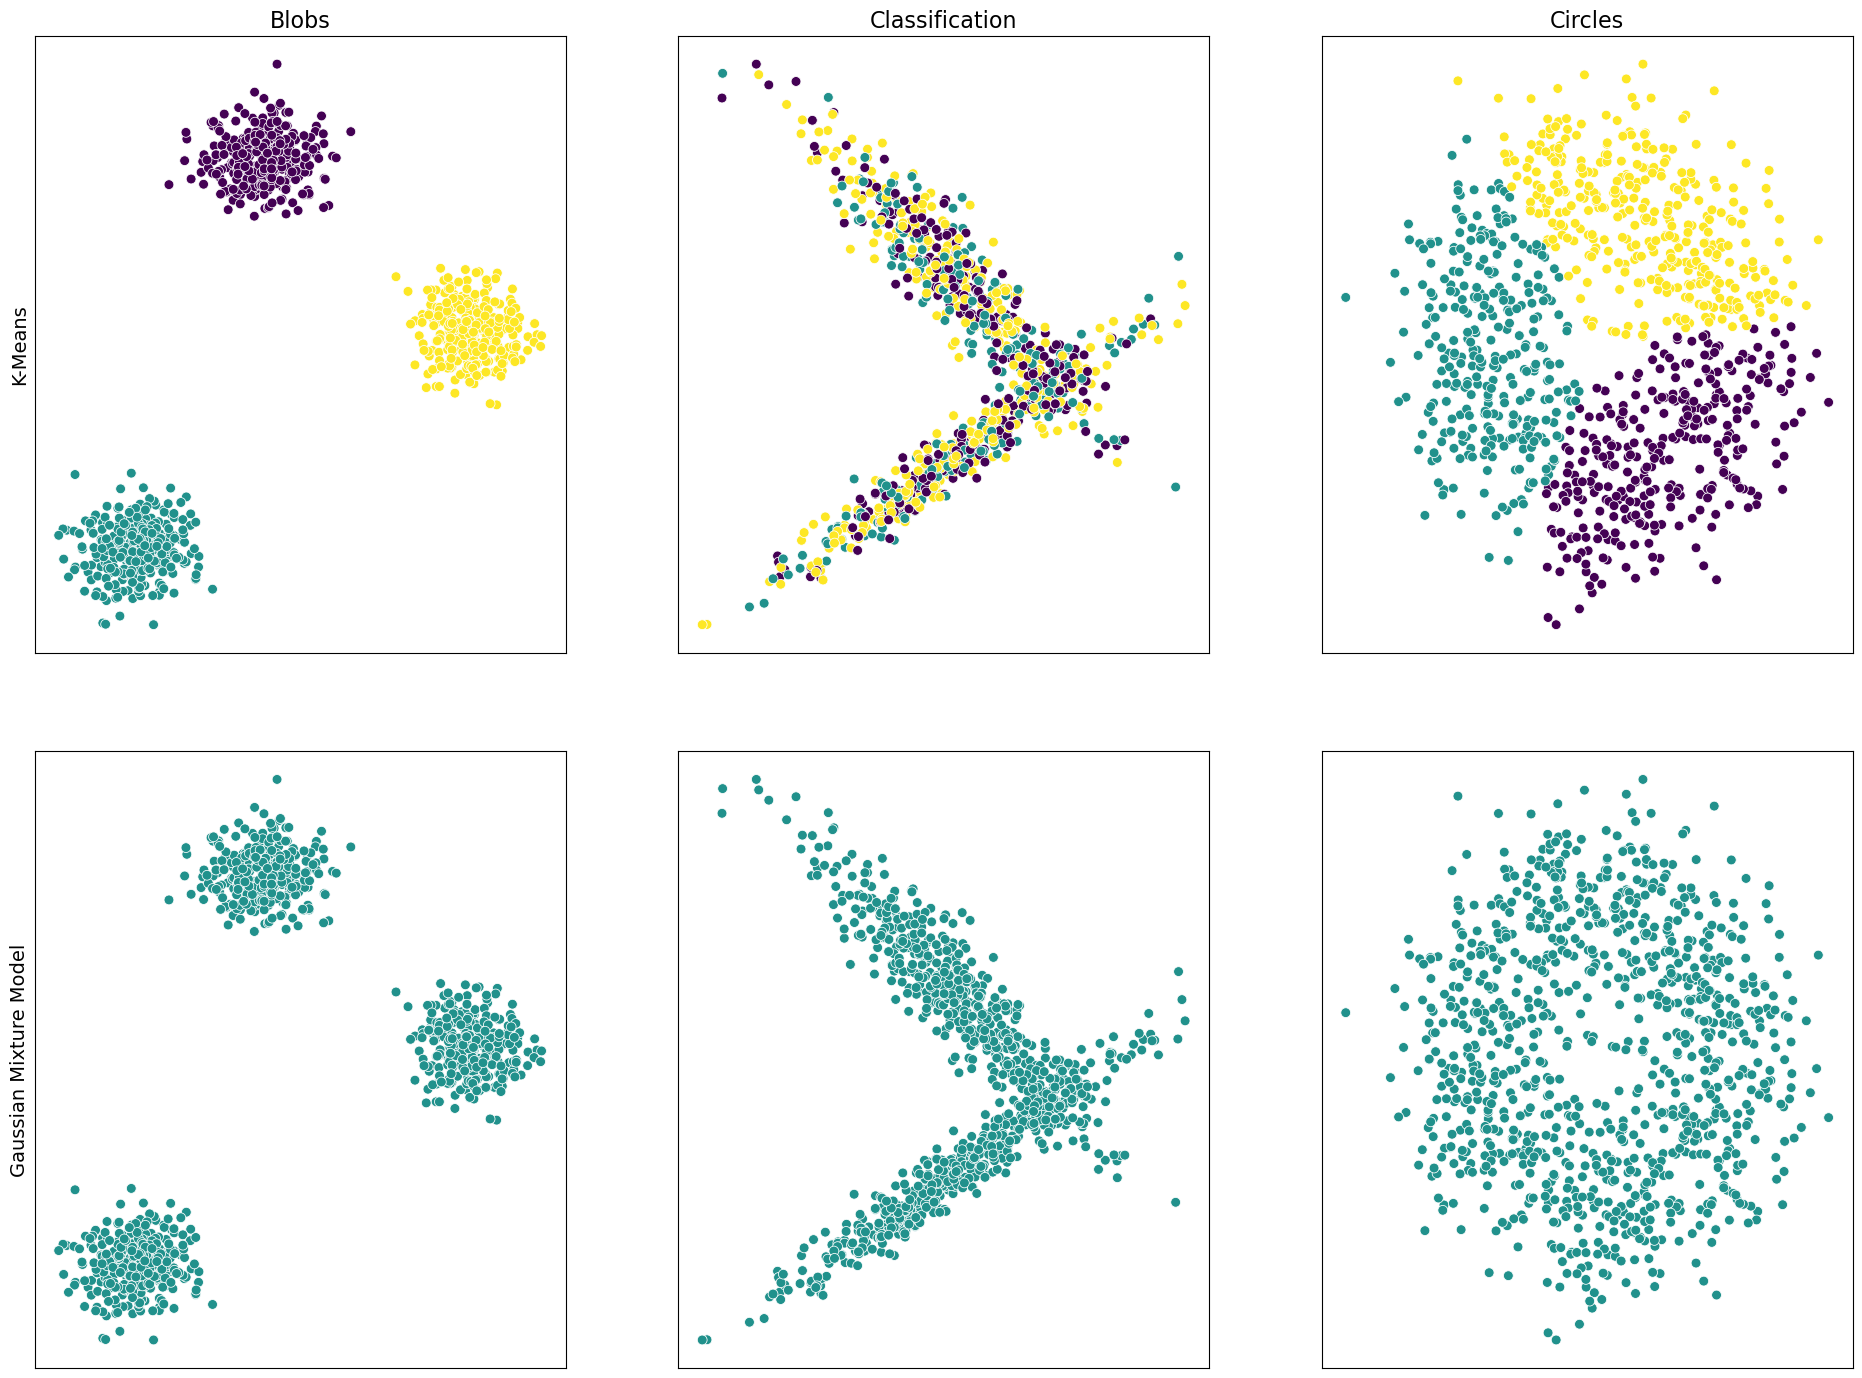

In [69]:
import seaborn as sns

fig, axes = plt.subplots(len(clustering_algorithms), len(datasets), figsize=(20, 15))
fig.tight_layout(pad=5.0)

# Add titles to the columns
for ax, dataset_name in zip(axes[0], datasets.keys()):
    ax.set_title(dataset_name, fontsize=16)

# Plot each algorithm's results
for i, (algo_name, dataset_results) in enumerate(results.items()):
    for j, (dataset_name, clusters) in enumerate(dataset_results.items()):
        ax = axes[i, j]
        sns.scatterplot(x=datasets[dataset_name][0][:, 0], y=datasets[dataset_name][0][:, 1], hue=clusters, palette='viridis', ax=ax, legend=None, s=50)
        if j == 0:
            ax.set_ylabel(algo_name, fontsize=14)
        else:
            ax.set_ylabel('')
        ax.set_xlabel('')
        ax.set_xticks([])
        ax.set_yticks([])

plt.show()

